In [248]:
import sys
import os
import pandas as pd
import gzip
import bz2
import numpy as np
import jax
import jax.numpy as jnp
import time
import pylab as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Covtype: https://archive.ics.uci.edu/ml/datasets/covertype
(No Longer Used)

In [ ]:
# covtype_path = "data/covtype.data.gz"

# covtype_np = np.loadtxt(covtype_path, delimiter=',')
# print(covtype_np.shape)

(581012, 55)


In [ ]:
# covtype_feature = covtype_np[:,:-1]
# covtype_label = covtype_np[:,-1].reshape(-1,1).astype(int)
# covtype_label = covtype_label - 1

# print(covtype_feature.shape)
# print(covtype_label.shape)

(581012, 54)
(581012, 1)


In [ ]:
# print(pd.DataFrame(np.unique(covtype_label, return_counts=True)).T)

   0       1
0  0  211840
1  1  283301
2  2   35754
3  3    2747
4  4    9493
5  5   17367
6  6   20510


In [ ]:
# covtype_feature_train, covtype_feature_test, covtype_label_train, covtype_label_test = \
#     train_test_split(covtype_feature, covtype_label, random_state=4212)

In [ ]:
# print(covtype_feature_train.shape)
# print(covtype_label_train.shape)
# print(covtype_feature_test.shape)
# print(covtype_label_test.shape)

(435759, 54)
(435759, 1)
(145253, 54)
(145253, 1)


In [ ]:
# covtype_df = pd.DataFrame(covtype_feature)

# covtype_df.iloc[:,:10].describe()

,0,1,2,3,4,5,6,7,8,9
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000


In [ ]:
# num_attribs = np.arange(0,10,1)
# cat_attribs = np.arange(10,54,1)

# full_pipeline = ColumnTransformer([
#         ("num", StandardScaler(), num_attribs),
#     ],remainder='passthrough')

# covtype_feature_train_norm = full_pipeline.fit_transform(covtype_feature_train)
# covtype_feature_test_norm = full_pipeline.transform(covtype_feature_test)
# print(covtype_feature_train_norm.shape)
# print(covtype_feature_test_norm.shape)

(435759, 54)
(145253, 54)


## IJCNN https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary.html#ijcnn1

In [ ]:
from sklearn.datasets import load_svmlight_file

filepath = '/content/drive/My Drive/Uni 3/DSA4212/DSA4212_Assignment2-utility/data/ijcnn1.tr.bz2'
ijcnn_train_data, ijcnn_train_label = load_svmlight_file(filepath)
filepath = '/content/drive/My Drive/Uni 3/DSA4212/DSA4212_Assignment2-utility/data/ijcnn1.t.bz2'
ijcnn_test_data, ijcnn_test_label = load_svmlight_file(filepath)

ijcnn_train_data = ijcnn_train_data.toarray()
ijcnn_test_data = ijcnn_test_data.toarray()

In [ ]:
ijcnn_train_label = ijcnn_train_label.astype(int)
ijcnn_test_label = ijcnn_test_label.astype(int)
ijcnn_train_label = (ijcnn_train_label+1) // 2
ijcnn_test_label = (ijcnn_test_label+1) // 2

In [ ]:
print(ijcnn_train_data.shape)
print(ijcnn_train_label.shape)
print(ijcnn_test_data.shape)
print(ijcnn_test_label.shape)

(35000, 22)
(35000,)
(91701, 22)
(91701,)


In [ ]:
print(ijcnn_train_data.max())
print(ijcnn_train_data.min())
# Already Scaled

1.0
-0.930435


## MNIST: http://yann.lecun.com/exdb/mnist/

In [ ]:
def training_images():
    with gzip.open('/content/drive/My Drive/Uni 3/DSA4212/DSA4212_Assignment2-utility/data/train-images-idx3-ubyte.gz', 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8)\
            .reshape((image_count, row_count, column_count))
        return images


def training_labels():
    with gzip.open('/content/drive/My Drive/Uni 3/DSA4212/DSA4212_Assignment2-utility/data/train-labels-idx1-ubyte.gz', 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        return labels.reshape(-1,1)
    
def test_images():
    with gzip.open('/content/drive/My Drive/Uni 3/DSA4212/DSA4212_Assignment2-utility/data/t10k-images-idx3-ubyte.gz', 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8)\
            .reshape((image_count, row_count, column_count))
        return images


def test_labels():
    with gzip.open('/content/drive/My Drive/Uni 3/DSA4212/DSA4212_Assignment2-utility/data/t10k-labels-idx1-ubyte.gz', 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        return labels.reshape(-1,1)

In [ ]:
mnist_train_images = training_images()
mnist_train_labels = training_labels()
print(mnist_train_images.shape)
print(mnist_train_labels.shape)

(60000, 28, 28)
(60000, 1)


In [ ]:
mnist_test_images = test_images()
mnist_test_labels = test_labels()
print(mnist_test_images.shape)
print(mnist_test_labels.shape)

(10000, 28, 28)
(10000, 1)


In [ ]:
print(pd.DataFrame(np.unique(mnist_train_labels, return_counts=True)).T)

   0     1
0  0  5923
1  1  6742
2  2  5958
3  3  6131
4  4  5842
5  5  5421
6  6  5918
7  7  6265
8  8  5851
9  9  5949


In [ ]:
print(np.max(mnist_train_images))
print(np.max(mnist_test_images))

255
255


In [ ]:
mnist_train_images = mnist_train_images / 255.
mnist_test_images = mnist_test_images / 255.

## Adult: https://archive.ics.uci.edu/ml/datasets/adult

In [ ]:
## Need further data cleaning & manipulating

adult_train = "/content/drive/My Drive/Uni 3/DSA4212/DSA4212_Assignment2-utility/data/adult.data"
adult_test = "/content/drive/My Drive/Uni 3/DSA4212/DSA4212_Assignment2-utility/data/adult.test"
adult_train_df = pd.read_csv(adult_train, header=None)
adult_test_df = pd.read_csv(adult_test, index_col=None)
adult_test_df = adult_test_df.reset_index()

In [ ]:
adult_col_names = ['age','workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation','relationship','race','sex','capital-gain','capital-loss', 'hours-per-week','native-country', 'salary']
adult_train_df.columns = adult_col_names
adult_test_df.columns = adult_col_names

In [ ]:
adult_feature_train = adult_train_df.iloc[:,:-1] 
adult_label_train = adult_train_df.iloc[:,-1]
adult_feature_test = adult_test_df.iloc[:,:-1]
adult_label_test = adult_test_df.iloc[:,-1]

In [ ]:
print(adult_feature_train.shape)
print(adult_label_train.shape)
print(adult_feature_test.shape)
print(adult_label_test.shape)

(32561, 14)
(32561,)
(16281, 14)
(16281,)


In [ ]:
adult_feature_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [ ]:
print(pd.DataFrame(np.unique(adult_label_train, return_counts=True)).T)
print(pd.DataFrame(np.unique(adult_label_test, return_counts=True)).T)

        0      1
0   <=50K  24720
1    >50K   7841
         0      1
0   <=50K.  12435
1    >50K.   3846


In [ ]:
adult_feature_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [ ]:
num_attribs = adult_feature_train.columns[adult_feature_train.dtypes == 'int64']
cat_attribs = adult_feature_train.columns[adult_feature_train.dtypes == 'object']
print(num_attribs)
print(cat_attribs)

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')
Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')


In [ ]:
num_attribs = adult_feature_train.columns[adult_feature_train.dtypes == 'int64']
cat_attribs = adult_feature_train.columns[adult_feature_train.dtypes == 'object']

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
        ("cat", OneHotEncoder(), cat_attribs)
    ])

adult_feature_train_norm = full_pipeline.fit_transform(adult_feature_train)
adult_feature_train_norm = adult_feature_train_norm.toarray()
adult_feature_test_norm = full_pipeline.transform(adult_feature_test)
adult_feature_test_norm = adult_feature_test_norm.toarray()

print(adult_feature_train_norm.shape)
print(adult_feature_test_norm.shape)

(32561, 108)
(16281, 108)


In [ ]:
n_train = adult_label_train.shape[0]
n_test = adult_label_test.shape[0]
adult_label_train_bi = np.zeros(n_train)
adult_label_test_bi = np.zeros(n_test)

adult_label_train_bi[adult_label_train == adult_label_train.unique()[1]] = 1
adult_label_test_bi[adult_label_test == adult_label_test.unique()[1]] = 1
adult_label_train_bi = adult_label_train_bi.astype(int)
adult_label_test_bi = adult_label_test_bi.astype(int)
print(pd.DataFrame(np.unique(adult_label_train_bi, return_counts=True)).T)
print(pd.DataFrame(np.unique(adult_label_test_bi, return_counts=True)).T)

   0      1
0  0  24720
1  1   7841
   0      1
0  0  12435
1  1   3846


# Utility Functions

## Common Utility

In [ ]:
@jax.jit
def pred_proba(beta, x):
    """ predict the probability vector of x belonging to each class """
    scores = beta@x
    return jnp.exp(scores) / jnp.sum(jnp.exp(scores))

pred_proba_batch = jax.vmap(pred_proba, in_axes=(None, 0)) # Vectorize Predict Function

In [ ]:
@jax.jit
def get_label(p):
    pred_label = jnp.argmax(p)
    return pred_label

def get_label_batch(P):
    labels = jax.vmap(get_label,in_axes=[0])(P)
    return labels.reshape(-1,1)
# get_label_batch = jax.vmap(get_label,in_axes=[0])

def get_accuracy(pred_labels, Y):
    """ Compare the predicted probability (p) with the ground truth labels (Y) to get the accuracy """
    return jnp.mean(Y==pred_labels)

def test_acc(beta,test_label, test_data):
    # Memory Problem
    N = test_label.shape[0]
    bs = 100
    
    running_acc=0
    n_mb=0
    
    for i in range(0,N,bs):
        mb_data = test_data[i:i+bs]
        mb_label = test_label[i:i+bs]
        
        mb_pred = pred_proba_batch(beta, mb_data)
        mb_pred_labels = get_label_batch(mb_pred)
        mb_acc = get_accuracy(mb_pred_labels, mb_label)
        
        running_acc += mb_acc
        n_mb += 1
    
    # test_acc = jnp.dot(running_acc, batch_sizes) / jnp.sum(batch_sizes)
    test_acc = running_acc / n_mb
        
    # test_pred = pred_proba_batch(beta, test_data)
    # test_acc = get_accuracy(test_pred, Y_true)
    return test_acc

## Graph Plotting

In [ ]:
def record_graph(record_list, key='test_acc_epoch', title="Summary of Results", alpha=0.6, n = None):
    """
    Plot graph of records in the list
    
    Args:
     record_list: List of record (dictionary) as returned by model training functions
     key: Performance metric to be plotted
     n: Number of results to be plotted, full results will be plotted if None
     
    Output:
     Multiple lines of the record on the same graph
    """
    keys = record_list[0].keys()
    if key not in keys:
        print(f'{key} is an invalid key!')
        print(f'Please enter one of the following: {keys}')
        
    plt.figure(figsize=(16,10))
        
    for record in record_list:
        if n == None:
            n = len(record.get(key))
        y = record.get(key)[:n]
        x = np.arange(n)

        labels = record.get('name')
        # if 'var' in key:
        #     labels = ["grad_" + str(i) for i in range(y[0].shape[0])]
            
        plt.plot(x,
                 y, 
                 "-.",
                 alpha=alpha,
                 label=labels)
        plt.xticks(range(n))
    
    plt.legend()
    plt.xlabel(f'{key}'.split('_')[-1])
    plt.ylabel(' '.join(f'{key}'.split('_')[:-1]))
    plt.grid(True)
    plt.title(title)

## Multi-Class Logistic Regression

In [ ]:
# Multi-Class Logistic Regression Loss
@jax.jit
def loss_single(beta, x, y):
    """
     Loss of a single data in multi-class Logistic Regression
    input:
     beta: Model parameters of shape [n, p], n = number of classes for label, p = dimension of features
     x: feature variables of shape p
     y: label, a single number indicating which class the data belongs to 
    """
    scores = beta@x
    scores = jnp.exp(scores) / jnp.sum(jnp.exp(scores)) # Softmax
    
    # scores = jax.nn.softmax(scores) # Softmax
    loss = -jnp.log(scores[y]) # Negative Loglikelihood of True Class
    return loss
    
loss_batch = jax.vmap(loss_single,in_axes=[None, 0, 0]) # Vectorize

def loss_LR(beta, X, Y):
    return jnp.mean(loss_batch(beta, X, Y))

def loss_LR_single(beta, x, y):
    loss = loss_single(beta, x, y)
    if loss.shape == ():
        return loss
    return loss[0]

In [ ]:
# compute derivates
loss_LR_grad = jax.jit(jax.grad(loss_LR, argnums=0))
loss_LR_values_and_grad = jax.jit(jax.value_and_grad(loss_LR, argnums=0))

loss_LR_single_grad = jax.jit(jax.grad(loss_LR_single, argnums=0))
loss_LR_single_values_and_grad = jax.jit(jax.value_and_grad(loss_LR_single, argnums=0))

### Testing Grad Var Calculation

In [ ]:
sum_grad_norm = jnp.zeros(7)
sum_grad_norm_2 = jnp.zeros(7)

In [ ]:
print(sum_grad_norm_2)
print(sum_grad_norm)

[0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0.]


In [ ]:
n_features = 54
n_classes = 7
np.random.seed(4212)

beta_init = np.random.normal(0,np.sqrt(1/(n_features)), size=[n_classes, n_features])

_, grad1 = loss_LR_values_and_grad(beta_init, covtype_feature_train_norm[:1000], covtype_label_train[:1000])
_, grad2 = loss_LR_values_and_grad(beta_init, covtype_feature_train_norm[1000:2000], covtype_label_train[1000:2000])
print(grad1.shape)
print(grad2.shape)

NameError: ignored

In [ ]:
jnp.linalg.norm(grad1,axis=None)

In [ ]:
new_grad_norm = jnp.linalg.norm(grad1,axis=1)
sum_grad_norm_2 += new_grad_norm**2
sum_grad_norm += new_grad_norm
print(new_grad_norm)
print(sum_grad_norm_2)
print(sum_grad_norm)

In [ ]:
new_grad_norm = jnp.linalg.norm(grad2,axis=1)
sum_grad_norm_2 += new_grad_norm**2
sum_grad_norm += new_grad_norm
print(new_grad_norm)
print(sum_grad_norm_2)
print(sum_grad_norm)

In [ ]:
n_update = 2
new_grad_var = sum_grad_norm_2 / n_update - (sum_grad_norm / n_update)**2
print(new_grad_var)

# SGD Algos

## 1. Basic SGD

To calculate variance of gradient estimates: https://stats.stackexchange.com/questions/244352/variance-of-gradient-as-e-g-in-sgd

In [ ]:
def train_SGD_single(train_data, train_label, beta_init, lr, loss_fn, grad_fn, verbose = 0, n_run=20, random_state=4212):
    """
     Find optimized beta given train images and train labels using Stochastic Gradient Descent (SGD) with Single Data per update of gradient
     
    Inputs:
     train_img: Training images (in the format of [n,:] array, where n is the number of images)
     train_label: Training labels (in the format of [n, 1] array, where n is the number of labels)
     beta: Starting point of beta (weights)
     lr: Learning rate
     loss_fn: Function to return the loss value
     grad_fn: Function to return the gradient
     verbose: Print time elapsed, training loss and test accuracy for each epoch if verbose = 1, default 0
     n_run: Number of computation of gradient / n, default 100
     
    Outputs:
     beta: The final updated values of beta
     record: A dictionary of performance during training, including 'loss_update', 'test_acc_update', 'grad_var_update'
    """
    N = len(train_data)  # total number of data
    img_indices = np.arange(N)

    loss_history_n = []
    grad_var = []
    
    beta = np.copy(beta_init)
    learning_rate = lr
    
    # Calc norm for each set of beta
    # n_grad = beta_init.shape[0]
    # sum_grad_norm_2 = jnp.zeros(n_grad)
    # sum_grad_norm = jnp.zeros(n_grad)
    
    sum_grad_norm_2 = 0
    sum_grad_norm = 0
    n_update = 0
    
    np.random.seed(random_state)

    start = time.time()
    for run in range(n_run*N):
        # randomize the batches
        idx = np.random.randint(0,N)

        X = train_data[idx]
        Y = train_label[idx]

        # compute the stochastic gradient
        grad = grad_fn(beta, X, Y)

        # compute the variance of gradient E(||g||^2) - E(||g||)^2
        # new_grad_norm = jnp.linalg.norm(grad,axis=1) # Calc norm for each set of beta

        # new_grad_norm = jnp.linalg.norm(grad,axis=None)
        # sum_grad_norm_2 += new_grad_norm**2
        # sum_grad_norm += new_grad_norm
        # n_update += 1
        # new_grad_var = sum_grad_norm_2 / n_update - (sum_grad_norm / n_update)**2
        # grad_var.append(new_grad_var)

        # do one step of SGD
        beta = beta - learning_rate*grad
            
        if (run+1)%N==0:
            loss = loss_fn(beta, train_data, train_label)
            loss_history_n.append(loss)
            if verbose == 1:
                end = time.time()
                duration = end - start
                print(f"# Grad/N {(run+1)//N}: {duration:.2f} seconds, Loss: {loss:.2f}")
            
    record = {'name': "SGD",
              'loss_#Grad/n': loss_history_n}
    
    return beta, record

In [ ]:
def train_SGD(train_data, train_label, test_data, test_label, beta_init, lr, loss_fn, grad_fn, verbose = 0, n_run=20, mb_size=100, random_state=4212):
    """
     Find optimized beta given train images and train labels using Stochastic Gradient Descent (SGD)
     
    Inputs:
     train_img: Training images (in the format of [n,:] array, where n is the number of images)
     train_label: Training labels (in the format of [n, 1] array, where n is the number of labels)
     beta: Starting point of beta (weights)
     lr: Learning rate
     loss_fn: Function to return the loss value
     grad_fn: Function to return the gradient
     verbose: Print time elapsed, training loss and test accuracy for each epoch if verbose = 1, default 0
     n_run: Number of computation of gradient / n, default 100
     mb_size: Minibatch size, default 100
     
    Outputs:
     beta: The final updated values of beta
     record: A dictionary of performance during training, including 'loss_epoch', 'loss_mb', 'test_acc_epoch', 'test_acc_mb', 'grad_var,mb'
    """
    minibatch_size = mb_size #size of the minibatchs
    N = len(train_data) // minibatch_size + 1  #total number of minibatches
    img_indices = np.arange(N)

    loss_history_n = []
    test_acc_history_n = []
    grad_var = []
    
    beta = np.copy(beta_init)
    learning_rate = lr
    
    # Calc norm for each set of beta
    # n_grad = beta_init.shape[0]
    # sum_grad_norm_2 = jnp.zeros(n_grad)
    # sum_grad_norm = jnp.zeros(n_grad)
    
    sum_grad_norm_2 = 0
    sum_grad_norm = 0
    n_update = 0
    
    np.random.seed(random_state)

    start = time.time()
    for run in range(n_run*N):

        # all_loss_within_epoch = []
        # all_acc_within_epoch = []
        # for k in range(n_minibatch):
            # create the minibatch of examples
            
        k = np.random.randint(0, N) # which minibatch to use
        batch_indices = np.arange(k*minibatch_size, (k+1)*minibatch_size) % N
        batch_indices = img_indices[batch_indices]

        X_minibatch = train_data[batch_indices]
        Y_minibatch = train_label[batch_indices]

        # compute the stochastic gradient
        grad = grad_fn(beta, X_minibatch, Y_minibatch)

        # compute the variance of gradient E(||g||^2) - E(||g||)^2
        # new_grad_norm = jnp.linalg.norm(grad,axis=1) # Calc norm for each set of beta

        # new_grad_norm = jnp.linalg.norm(grad,axis=None)
        # sum_grad_norm_2 += new_grad_norm**2
        # sum_grad_norm += new_grad_norm
        # n_update += 1
        # new_grad_var = sum_grad_norm_2 / n_update - (sum_grad_norm / n_update)**2
        # grad_var.append(new_grad_var)

        # do one step of SGD
        beta = beta - learning_rate*grad

            
#         loss_epoch = np.mean(all_loss_within_epoch)
#         loss_history_epoch.append(loss_epoch)
        
#         test_acc_epoch = np.mean(all_acc_within_epoch)
#         test_acc_history_epoch.append(test_acc_epoch)
        
        if (run+1)%N==0:
            loss = loss_fn(beta, train_data, train_label)
            loss_history_n.append(loss)
            
            test_acc_new = test_acc(beta, test_label, test_data)
            test_acc_history_n.append(test_acc_new)
            if verbose == 1:
                end = time.time()
                duration = end - start
                print(f"# Grad/N {(run+1)//N}: {duration:.2f} seconds, Loss: {loss:.2f}, Test Accuracy: {test_acc_new:.3f}")
            
    record = {'name': "SGD",
              'loss_#Grad/n': loss_history_n,
              'test_acc_#Grad/n': test_acc_history_n}
    
    return beta, record

## 2. SAG

## 3. SVRG

In [ ]:
@jax.jit
def loss_single(beta, x, y):
    """
     Loss of a single data in multi-class Logistic Regression
    input:
     beta: Model parameters of shape [n, p], n = number of classes for label, p = dimension of features
     x: feature variables of shape p
     y: label, a single number indicating which class the data belongs to 
    """
    scores = beta@x
    scores = jnp.exp(scores) / jnp.sum(jnp.exp(scores)) # Softmax
    # scores = jax.nn.softmax(scores) # Softmax
    loss = -jnp.log(scores[y]) # Negative Loglikelihood of True Class
    return loss

loss_batch = jax.vmap(loss_single, in_axes=[None, 0, 0]) # Vectorize

@jax.jit
def loss_LR_SVRG(beta, X, Y, single=None):
    """
    Minibatch Logistic regression loss
    
    args:
    ====
     beta: LR parameter
     X: array[:,:] of images
     Y: array[:] of labels
    """
    if single is not None:
      X, Y = X[single], Y[single]
      losses = loss_single(beta, X, Y)

    if single is None:        
      # compute all the individual losses
      losses = loss_batch(beta, X, Y)

    return jnp.mean(losses)

# compute derivates
loss_LR_SVRG_grad = jax.jit(jax.grad(loss_LR_SVRG, argnums=0))
loss_LR_SVRG_values_and_grad = jax.jit(jax.value_and_grad(loss_LR_SVRG, argnums=0))

In [ ]:
def train_SVRG(train_data, train_label, test_data, test_label, beta_init, lr, loss_fn, grad_fn, verbose = 0, n_run=20, mb_size=100, random_state=4212):
    """
     Find optimized beta given train images and train labels using Stochastic Gradient Descent (SGD)
     
    Inputs:
     train_img: Training images (in the format of [n,:] array, where n is the number of images)
     train_label: Training labels (in the format of [n, 1] array, where n is the number of labels)
     beta: Starting point of beta (weights)
     lr: Learning rate
     loss_fn: Function to return the loss value
     grad_fn: Function to return the gradient
     verbose: Print time elapsed, training loss and test accuracy for each epoch if verbose = 1, default 0
     n_run: Number of computation of gradient / n, default 100
     mb_size: Minibatch size, default 100
     
    Outputs:
     beta: The final updated values of beta
     record: A dictionary of performance during training, including 'loss_epoch', 'loss_mb', 'test_acc_epoch', 'test_acc_mb', 'grad_var,mb'
    """
    minibatch_size = mb_size #size of the minibatchs
    N = len(train_data) // minibatch_size + 1  #total number of minibatches
    img_indices = np.arange(N)

    loss_history_n = []
    test_acc_history_n = []
    grad_var = []
    
    beta = np.copy(beta_init)
    learning_rate = lr
    m = 2*(N//mb_size) ## m slightly larger than n
    count_n = 0
    grad_n = 0 
    
    # Calc norm for each set of beta
    # n_grad = beta_init.shape[0]
    # sum_grad_norm_2 = jnp.zeros(n_grad)
    # sum_grad_norm = jnp.zeros(n_grad)
    
    sum_grad_norm_2 = 0
    sum_grad_norm = 0
    n_update = 0
    
    np.random.seed(random_state)


    start = time.time()
    for run in range(((n_run*N)//m)+1):

        # all_loss_within_epoch = []
        # all_acc_within_epoch = []
        # for k in range(n_minibatch):
        # create the minibatch of examples
            
        # k = np.random.randint(0, N) # which minibatch to use
        # batch_indices = np.arange(k*minibatch_size, (k+1)*minibatch_size) % N
        # batch_indices = img_indices[batch_indices]

        # X_minibatch = train_data[batch_indices]
        # Y_minibatch = train_label[batch_indices]

        #
        v0 = beta
        v = np.copy(v0)

        # compute the stochastic gradient
        # grad = grad_fn(beta, X_minibatch, Y_minibatch)
        snapshot = grad_fn(v0, train_data, train_label)

        # compute the variance of gradient E(||g||^2) - E(||g||)^2
        # new_grad_norm = jnp.linalg.norm(grad,axis=1) # Calc norm for each set of beta

        # new_grad_norm = jnp.linalg.norm(grad,axis=None)
        # sum_grad_norm_2 += new_grad_norm**2
        # sum_grad_norm += new_grad_norm
        # n_update += 1
        # new_grad_var = sum_grad_norm_2 / n_update - (sum_grad_norm / n_update)**2
        # grad_var.append(new_grad_var)

        # do m step of SGD
        for j in range(m):
            # i = np.random.randint(mb_size)
            i = np.random.randint(0, N) # which minibatch to use
            batch_indices = np.arange(i*minibatch_size, (i+1)*minibatch_size) % N
            batch_indices = img_indices[batch_indices]

            X_minibatch = train_data[batch_indices]
            Y_minibatch = train_label[batch_indices]

            update_vec = grad_fn(v, X_minibatch, Y_minibatch) - grad_fn(v0, X_minibatch, Y_minibatch)+snapshot
            v -= lr*update_vec
            grad_n += 1


            if (grad_n+1)%N==0:
                beta_temp = v
                loss = loss_fn(beta_temp, train_data, train_label)
                loss_history_n.append(loss)
            
                test_acc_new = test_acc(beta_temp, test_label, test_data)
                test_acc_history_n.append(test_acc_new)
                if verbose == 1:
                    end = time.time()
                    duration = end - start
                    print(f"# Grad/N {count_n+1}: {duration:.2f} seconds, Loss: {loss:.2f}, Test Accuracy: {test_acc_new:.3f}")
                    count_n += 1

        beta = v


            
#         loss_epoch = np.mean(all_loss_within_epoch)
#         loss_history_epoch.append(loss_epoch)
        
#         test_acc_epoch = np.mean(all_acc_within_epoch)
#         test_acc_history_epoch.append(test_acc_epoch)
        
            
    record = {'name': "SVRG",
              'loss_#Grad/n': loss_history_n,
              'test_acc_#Grad/n': test_acc_history_n}
    
    return beta, record

In [ ]:
def train_SVRG_single(train_data, train_label, beta_init, lr, loss_fn, grad_fn, verbose = 0, n_run=100, random_state=4212):
    """
     Find optimized beta given train images and train labels using Stochastic Gradient Descent (SGD) with Single Data per update of gradient
     
    Inputs:
     train_img: Training images (in the format of [n,:] array, where n is the number of images)
     train_label: Training labels (in the format of [n, 1] array, where n is the number of labels)
     beta: Starting point of beta (weights)
     lr: Learning rate
     val_grad_fn: Function to return the loss value and gradient given X and Y
     verbose: Print time elapsed, training loss and test accuracy for each epoch if verbose = 1, default 0
     n_run: Number of update of gradient, default 100
     
    Outputs:
     beta: The final updated values of beta
     record: A dictionary of performance during training, including 'loss', 'test_acc', 'grad_var'
    """
    N = len(train_data)  # total number of data
    img_indices = np.arange(N)

    loss_history_n = []
    grad_var = []
    
    beta = np.copy(beta_init)
    learning_rate = lr
    m = 2*N ## m slightly larger than n
    count_n = 0
    
    # Calc norm for each set of beta
    # n_grad = beta_init.shape[0]
    # sum_grad_norm_2 = jnp.zeros(n_grad)
    # sum_grad_norm = jnp.zeros(n_grad)
    
    sum_grad_norm_2 = 0
    sum_grad_norm = 0
    n_update = 0
    
    np.random.seed(random_state)

    start = time.time()
    for run in range(n_run):
        # randomize the batches
        idx = np.random.randint(0,N)

        X = train_data[idx]
        Y = train_label[idx]

        # compute the stochastic gradient
        grad = grad_fn(beta, X, Y)

        # compute the variance of gradient E(||g||^2) - E(||g||)^2
        # new_grad_norm = jnp.linalg.norm(grad,axis=1) # Calc norm for each set of beta

        new_grad_norm = jnp.linalg.norm(grad,axis=None)
        sum_grad_norm_2 += new_grad_norm**2
        sum_grad_norm += new_grad_norm
        n_update += 1
        new_grad_var = sum_grad_norm_2 / n_update - (sum_grad_norm / n_update)**2
        grad_var.append(new_grad_var)

        v0 = beta
        v = np.copy(v0)
        snapshot = loss_LR_SVRG_grad(v0, train_data, train_label)

        # do m step of SGD
        for k in range(m):
            i = np.random.randint(N)
            grad_v = grad_fn(v, train_data[i], train_label[i])
            grad_v0 = grad_fn(v0, train_data[i], train_label[i])
            update_vec = grad_v - grad_v0 + snapshot
            v -= lr*update_vec

            if (k+1)%N==0:
                beta_temp = v
                loss = loss_fn(beta_temp, train_data, train_label)
                loss_history_n.append(loss)
                if verbose == 1:
                    end = time.time()
                    duration = end - start
                    print(f"# Grad/N {count_n+1}: {duration:.2f} seconds, Loss: {loss:.2f}")
                    count_n += 1

        beta = v

        # book-keeping
        # loss_history.append(val)

        # test_accuracy = test_acc(beta, test_label, test_data)
        # test_acc_history.append(test_accuracy)

    record = {'name': "SVRG", 'loss_#Grad/n': loss_history_n}
          
    
    return beta, record

## 4. SAG

### ......

## Experiment with Covtype
(No longer used)

In [ ]:
train_data, test_data, train_label, test_label = covtype_feature_train_norm, covtype_feature_test_norm, covtype_label_train, covtype_label_test

In [ ]:
print(np.unique(train_label, return_counts=True))
print(np.unique(test_label, return_counts=True))
print(train_data.shape)
print(test_data.shape)

(array([0, 1, 2, 3, 4, 5, 6]), array([158988, 212405,  26835,   2064,   7091,  13016,  15360],
      dtype=int64))
(array([0, 1, 2, 3, 4, 5, 6]), array([52852, 70896,  8919,   683,  2402,  4351,  5150], dtype=int64))
(435759, 54)
(145253, 54)


In [ ]:
# Test with Covtype
n_features = 54
n_classes = 7
np.random.seed(4212)

beta_init = np.random.normal(0,np.sqrt(1/(n_features)), size=[n_classes, n_features])

In [ ]:
beta_init.shape

(7, 54)

### Single Version (Grad Var and Train Loss)

In [ ]:
beta = np.copy(beta_init)

beta_SGD_single, record_SGD_single = train_SGD_single(train_data, train_label, beta_init, 0.01, loss_LR, loss_LR_single_grad, n_run=20, verbose = 1)

# Grad/N 1: 22.18 seconds, Loss: 0.64
# Grad/N 2: 44.17 seconds, Loss: 0.64
# Grad/N 3: 68.41 seconds, Loss: 0.64
# Grad/N 4: 91.47 seconds, Loss: 0.65
# Grad/N 5: 114.24 seconds, Loss: 0.65
# Grad/N 6: 136.40 seconds, Loss: 0.64
# Grad/N 7: 158.92 seconds, Loss: 0.64
# Grad/N 8: 182.71 seconds, Loss: 0.66
# Grad/N 9: 205.24 seconds, Loss: 0.65
# Grad/N 10: 225.79 seconds, Loss: 0.64
# Grad/N 11: 248.28 seconds, Loss: 0.65
# Grad/N 12: 272.03 seconds, Loss: 0.64
# Grad/N 13: 297.38 seconds, Loss: 0.64
# Grad/N 14: 320.42 seconds, Loss: 0.64
# Grad/N 15: 341.99 seconds, Loss: 0.64
# Grad/N 16: 362.21 seconds, Loss: 0.64
# Grad/N 17: 382.29 seconds, Loss: 0.64
# Grad/N 18: 402.83 seconds, Loss: 0.64
# Grad/N 19: 422.98 seconds, Loss: 0.64
# Grad/N 20: 443.55 seconds, Loss: 0.64


In [ ]:
# SAG


In [ ]:
# SVRG


In [ ]:
# SAGA


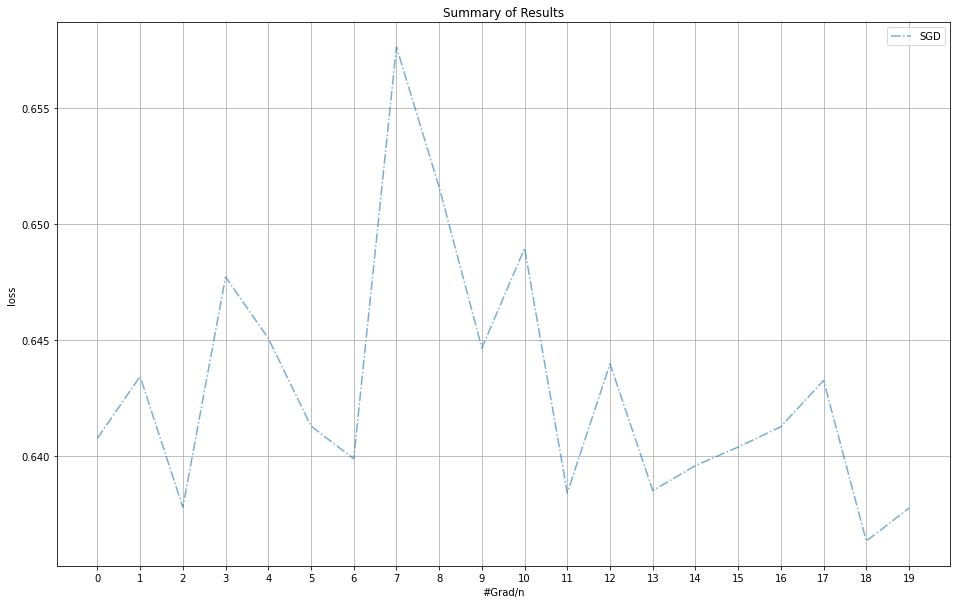

In [ ]:
record_graph([record_SGD_single],'loss_#Grad/n')

### Minibatch Version (Test Acc)

In [ ]:
beta = np.copy(beta_init)

beta_SGD, record_SGD = train_SGD(train_data, train_label, test_data, test_label, beta_init, 0.01, loss_LR, loss_LR_grad, verbose = 1, n_run=20, mb_size=100)

# Grad/N 1: 3.12 seconds, Loss: 0.81, Test Accuracy: 0.689
# Grad/N 2: 5.64 seconds, Loss: 0.75, Test Accuracy: 0.696
# Grad/N 3: 7.82 seconds, Loss: 0.73, Test Accuracy: 0.702
# Grad/N 4: 10.02 seconds, Loss: 0.71, Test Accuracy: 0.707
# Grad/N 5: 12.33 seconds, Loss: 0.70, Test Accuracy: 0.710
# Grad/N 6: 14.52 seconds, Loss: 0.69, Test Accuracy: 0.712
# Grad/N 7: 17.10 seconds, Loss: 0.69, Test Accuracy: 0.714
# Grad/N 8: 19.53 seconds, Loss: 0.69, Test Accuracy: 0.714
# Grad/N 9: 21.87 seconds, Loss: 0.68, Test Accuracy: 0.716
# Grad/N 10: 24.43 seconds, Loss: 0.68, Test Accuracy: 0.716
# Grad/N 11: 26.80 seconds, Loss: 0.68, Test Accuracy: 0.717
# Grad/N 12: 29.07 seconds, Loss: 0.67, Test Accuracy: 0.717
# Grad/N 13: 31.54 seconds, Loss: 0.67, Test Accuracy: 0.717
# Grad/N 14: 33.87 seconds, Loss: 0.67, Test Accuracy: 0.718
# Grad/N 15: 36.78 seconds, Loss: 0.67, Test Accuracy: 0.718
# Grad/N 16: 39.09 seconds, Loss: 0.67, Test Accuracy: 0.718
# Grad/N 17: 41.20 seconds, Loss: 0.

In [ ]:
# SAG


In [ ]:
# SVRG


In [ ]:
# SAGA


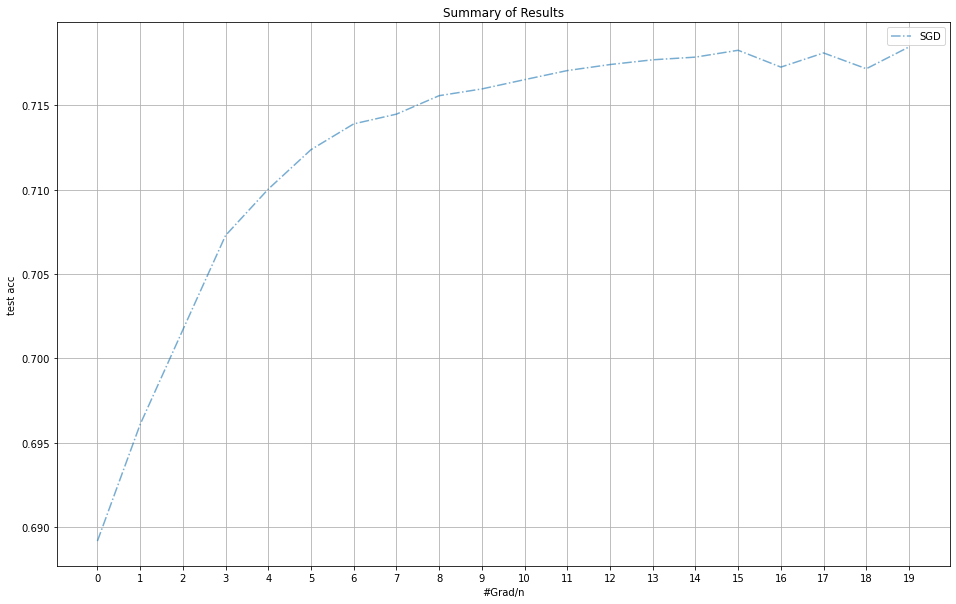

In [ ]:
record_graph([record_SGD],'test_acc_#Grad/n')

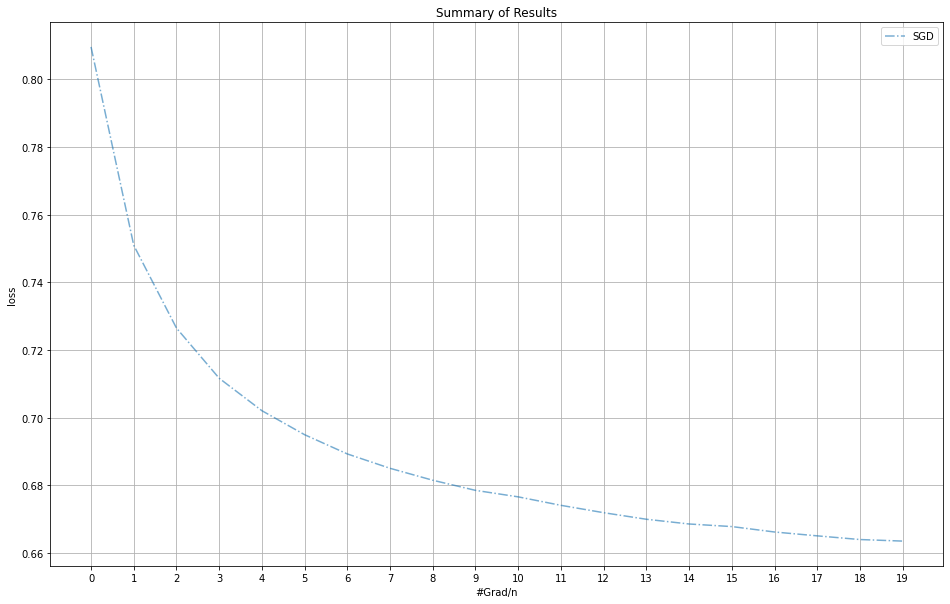

In [ ]:
record_graph([record_SGD],'loss_#Grad/n')

## Experiment with IJCNN

In [ ]:
ijcnn_train_data.shape

(35000, 22)

In [ ]:
train_data, test_data, train_label, test_label = ijcnn_train_data, ijcnn_test_data, ijcnn_train_label, ijcnn_test_label

In [ ]:
print(np.unique(train_label, return_counts=True))
print(np.unique(test_label, return_counts=True))
print(train_data.shape)
print(test_data.shape)

(array([0, 1]), array([31585,  3415]))
(array([0, 1]), array([82989,  8712]))
(35000, 22)
(91701, 22)


In [ ]:
n_features = 22
n_classes = 2
np.random.seed(4212)

beta_init = np.random.normal(0,np.sqrt(1/(n_features)), size=[n_classes, n_features])

In [ ]:
beta_init.shape

(2, 22)

### Single Version (Train Loss)

In [ ]:
beta = np.copy(beta_init)

beta_SGD_single, record_SGD_single = train_SGD_single(train_data, train_label, beta_init, 0.01, loss_LR, loss_LR_single_grad, n_run=20, verbose = 1)

# Grad/N 1: 0.96 seconds, Loss: 0.25
# Grad/N 2: 1.92 seconds, Loss: 0.23
# Grad/N 3: 2.86 seconds, Loss: 0.21
# Grad/N 4: 3.79 seconds, Loss: 0.21
# Grad/N 5: 4.98 seconds, Loss: 0.20
# Grad/N 6: 5.96 seconds, Loss: 0.20
# Grad/N 7: 7.59 seconds, Loss: 0.20
# Grad/N 8: 9.16 seconds, Loss: 0.20
# Grad/N 9: 10.86 seconds, Loss: 0.20
# Grad/N 10: 11.78 seconds, Loss: 0.20
# Grad/N 11: 12.72 seconds, Loss: 0.20
# Grad/N 12: 13.66 seconds, Loss: 0.20
# Grad/N 13: 14.75 seconds, Loss: 0.20
# Grad/N 14: 15.69 seconds, Loss: 0.20
# Grad/N 15: 17.15 seconds, Loss: 0.20
# Grad/N 16: 18.91 seconds, Loss: 0.20
# Grad/N 17: 21.12 seconds, Loss: 0.20
# Grad/N 18: 22.83 seconds, Loss: 0.20
# Grad/N 19: 24.58 seconds, Loss: 0.20
# Grad/N 20: 25.53 seconds, Loss: 0.20


In [ ]:
# SAG


In [ ]:
# SVRG
beta = np.copy(beta_init)

beta_SVRG_single, record_SVRG_single = train_SVRG_single(train_data, train_label, beta_init, 0.01, loss_LR, loss_LR_single_grad, n_run=10, verbose = 1)

# Grad/N 1: 1.69 seconds, Loss: 0.25
# Grad/N 2: 3.40 seconds, Loss: 0.23
# Grad/N 3: 5.05 seconds, Loss: 0.21
# Grad/N 4: 6.66 seconds, Loss: 0.21
# Grad/N 5: 8.28 seconds, Loss: 0.20
# Grad/N 6: 9.92 seconds, Loss: 0.20
# Grad/N 7: 11.54 seconds, Loss: 0.20
# Grad/N 8: 13.17 seconds, Loss: 0.20
# Grad/N 9: 14.84 seconds, Loss: 0.20
# Grad/N 10: 16.47 seconds, Loss: 0.20
# Grad/N 11: 18.11 seconds, Loss: 0.20
# Grad/N 12: 19.78 seconds, Loss: 0.20
# Grad/N 13: 21.44 seconds, Loss: 0.20
# Grad/N 14: 24.29 seconds, Loss: 0.20
# Grad/N 15: 27.60 seconds, Loss: 0.20
# Grad/N 16: 31.95 seconds, Loss: 0.20
# Grad/N 17: 34.99 seconds, Loss: 0.20
# Grad/N 18: 37.93 seconds, Loss: 0.20
# Grad/N 19: 39.60 seconds, Loss: 0.20
# Grad/N 20: 41.29 seconds, Loss: 0.20


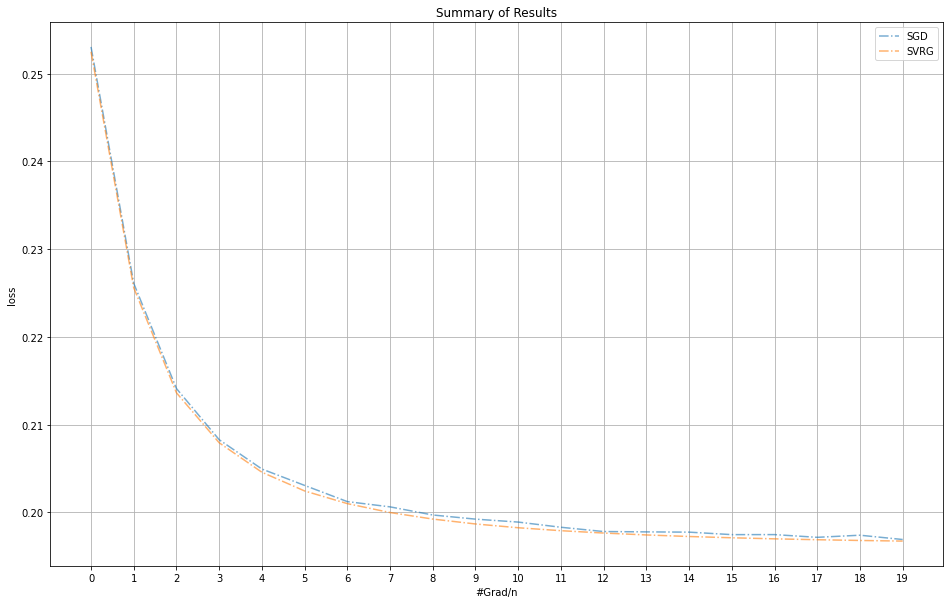

In [ ]:
record_graph([record_SGD_single,record_SVRG_single],'loss_#Grad/n')

In [ ]:
# SAGA


In [ ]:
# record_graph([record_SGD_single],'loss_#Grad/n')

### Minibatch Version (Test Acc)

In [ ]:
beta = np.copy(beta_init)

beta_SGD, record_SGD = train_SGD(train_data, train_label, test_data, test_label, beta_init, 0.01, loss_LR, loss_LR_grad, verbose = 1, n_run=20, mb_size=100)

# Grad/N 1: 1.30 seconds, Loss: 0.63, Test Accuracy: 0.841
# Grad/N 2: 2.57 seconds, Loss: 0.62, Test Accuracy: 0.848
# Grad/N 3: 3.83 seconds, Loss: 0.62, Test Accuracy: 0.850
# Grad/N 4: 5.08 seconds, Loss: 0.63, Test Accuracy: 0.850
# Grad/N 5: 6.34 seconds, Loss: 0.63, Test Accuracy: 0.851
# Grad/N 6: 7.59 seconds, Loss: 0.63, Test Accuracy: 0.851
# Grad/N 7: 8.84 seconds, Loss: 0.63, Test Accuracy: 0.851
# Grad/N 8: 10.11 seconds, Loss: 0.63, Test Accuracy: 0.851
# Grad/N 9: 11.36 seconds, Loss: 0.64, Test Accuracy: 0.851
# Grad/N 10: 12.63 seconds, Loss: 0.64, Test Accuracy: 0.851
# Grad/N 11: 13.89 seconds, Loss: 0.64, Test Accuracy: 0.851
# Grad/N 12: 15.13 seconds, Loss: 0.64, Test Accuracy: 0.851
# Grad/N 13: 16.39 seconds, Loss: 0.64, Test Accuracy: 0.851
# Grad/N 14: 17.65 seconds, Loss: 0.64, Test Accuracy: 0.851
# Grad/N 15: 18.90 seconds, Loss: 0.64, Test Accuracy: 0.851
# Grad/N 16: 20.19 seconds, Loss: 0.64, Test Accuracy: 0.851
# Grad/N 17: 21.44 seconds, Loss: 0.64, 

In [ ]:
# SAG


In [ ]:
# SVRG
beta = np.copy(beta_init)

beta_SVRG, record_SVRG = train_SVRG(train_data, train_label, test_data, test_label, beta_init, 0.01, loss_LR, loss_LR_grad, verbose = 1, n_run=20, mb_size=100)

# Grad/N 1: 1.50 seconds, Loss: 0.56, Test Accuracy: 0.845
# Grad/N 2: 2.99 seconds, Loss: 0.48, Test Accuracy: 0.904
# Grad/N 3: 4.46 seconds, Loss: 0.43, Test Accuracy: 0.905
# Grad/N 4: 5.94 seconds, Loss: 0.40, Test Accuracy: 0.905
# Grad/N 5: 7.43 seconds, Loss: 0.38, Test Accuracy: 0.905
# Grad/N 6: 8.91 seconds, Loss: 0.36, Test Accuracy: 0.905
# Grad/N 7: 10.37 seconds, Loss: 0.35, Test Accuracy: 0.905
# Grad/N 8: 11.85 seconds, Loss: 0.34, Test Accuracy: 0.905
# Grad/N 9: 13.37 seconds, Loss: 0.34, Test Accuracy: 0.905
# Grad/N 10: 14.86 seconds, Loss: 0.33, Test Accuracy: 0.905
# Grad/N 11: 16.36 seconds, Loss: 0.33, Test Accuracy: 0.905
# Grad/N 12: 17.84 seconds, Loss: 0.32, Test Accuracy: 0.905
# Grad/N 13: 19.32 seconds, Loss: 0.32, Test Accuracy: 0.905
# Grad/N 14: 20.79 seconds, Loss: 0.32, Test Accuracy: 0.905
# Grad/N 15: 22.29 seconds, Loss: 0.32, Test Accuracy: 0.905
# Grad/N 16: 23.76 seconds, Loss: 0.31, Test Accuracy: 0.905
# Grad/N 17: 25.24 seconds, Loss: 0.31,

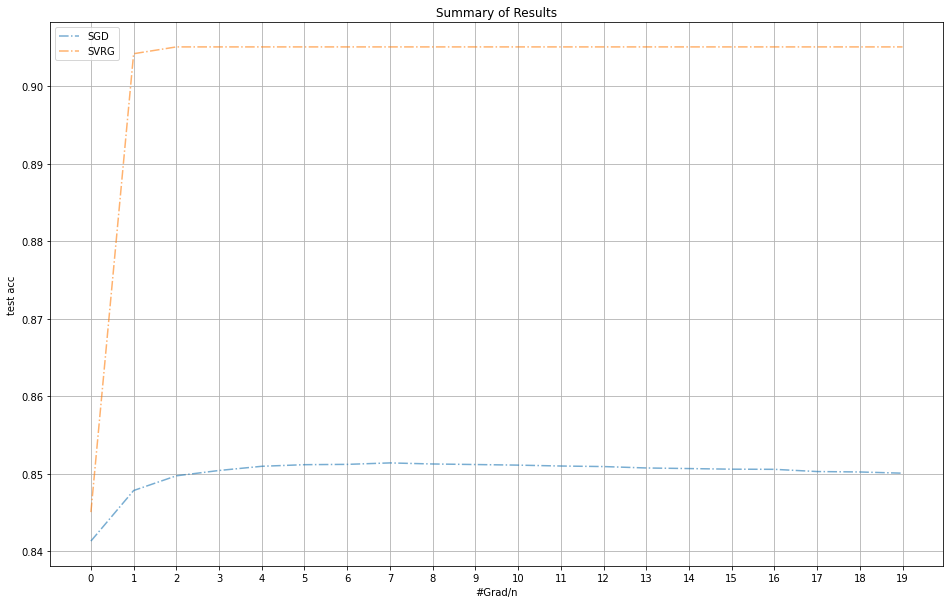

In [ ]:
record_graph([record_SGD, record_SVRG], 'test_acc_#Grad/n')

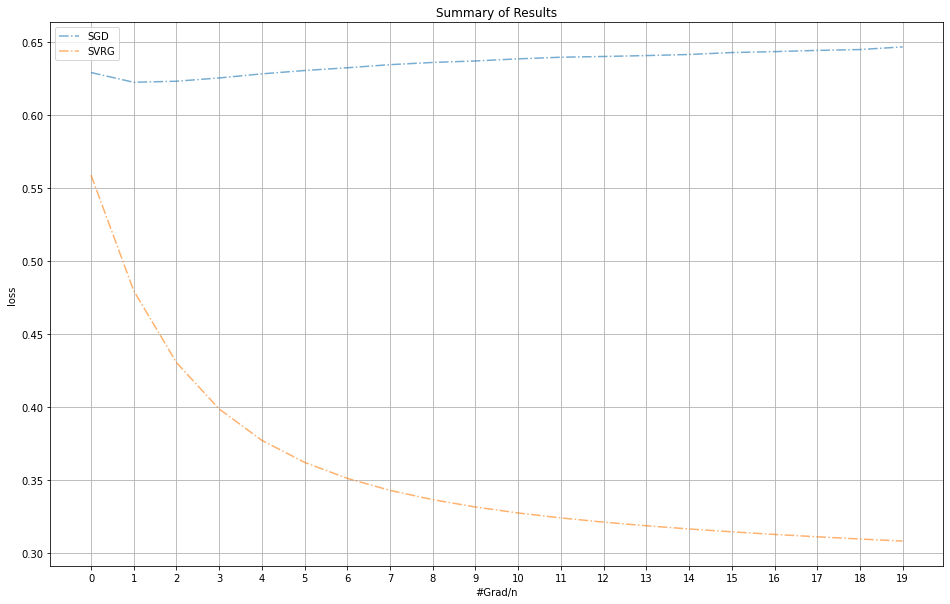

In [ ]:
record_graph([record_SGD, record_SVRG], 'loss_#Grad/n')

In [ ]:
# SAGA


In [ ]:
# record_graph([record_SGD],'test_acc_#Grad/n')

In [ ]:
# record_graph([record_SGD],'loss_#Grad/n')

## Experiment with MNIST

In [ ]:
mnist_train_images.shape

(60000, 28, 28)

In [ ]:
train_data, test_data, train_label, test_label = mnist_train_images.reshape(-1,28*28), mnist_test_images.reshape(-1,28*28), mnist_train_labels, mnist_test_labels

In [ ]:
print(np.unique(train_label, return_counts=True))
print(np.unique(test_label, return_counts=True))
print(train_data.shape)
print(test_data.shape)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))
(60000, 784)
(10000, 784)


In [ ]:
n_features = 28*28
n_classes = 10
np.random.seed(4212)

beta_init = np.random.normal(0,np.sqrt(1/(n_features)), size=[n_classes, n_features])

In [ ]:
beta_init.shape

(10, 784)

### Single Version (Grad Var and Train Loss)

In [ ]:
beta = np.copy(beta_init)

beta_SGD_single, record_SGD_single = train_SGD_single(train_data, train_label, beta_init, 0.01, loss_LR, loss_LR_single_grad, n_run=20, verbose = 1)

# Grad/N 1: 2.37 seconds, Loss: 0.31
# Grad/N 2: 4.69 seconds, Loss: 0.29
# Grad/N 3: 6.99 seconds, Loss: 0.28
# Grad/N 4: 9.22 seconds, Loss: 0.28
# Grad/N 5: 11.50 seconds, Loss: 0.30
# Grad/N 6: 13.76 seconds, Loss: 0.28
# Grad/N 7: 16.01 seconds, Loss: 0.28
# Grad/N 8: 18.28 seconds, Loss: 0.27
# Grad/N 9: 20.51 seconds, Loss: 0.28
# Grad/N 10: 22.74 seconds, Loss: 0.28
# Grad/N 11: 24.99 seconds, Loss: 0.28
# Grad/N 12: 27.22 seconds, Loss: 0.28
# Grad/N 13: 29.50 seconds, Loss: 0.26
# Grad/N 14: 31.76 seconds, Loss: 0.27
# Grad/N 15: 34.89 seconds, Loss: 0.27
# Grad/N 16: 37.16 seconds, Loss: 0.26
# Grad/N 17: 39.41 seconds, Loss: 0.26
# Grad/N 18: 42.95 seconds, Loss: 0.26
# Grad/N 19: 45.20 seconds, Loss: 0.25
# Grad/N 20: 47.45 seconds, Loss: 0.26


In [ ]:
# SAG


In [ ]:
# SVRG
beta = np.copy(beta_init)

beta_SVRG_single, record_SVRG_single = train_SVRG_single(train_data, train_label, beta_init, 0.01, loss_LR, loss_LR_single_grad, n_run=10, verbose = 1)

# Grad/N 1: 4.49 seconds, Loss: 0.47
# Grad/N 2: 8.78 seconds, Loss: 0.47
# Grad/N 3: 13.18 seconds, Loss: 0.29
# Grad/N 4: 17.18 seconds, Loss: 0.28
# Grad/N 5: 21.40 seconds, Loss: 0.26
# Grad/N 6: 25.39 seconds, Loss: 0.26
# Grad/N 7: 29.53 seconds, Loss: 0.25
# Grad/N 8: 33.55 seconds, Loss: 0.25
# Grad/N 9: 37.71 seconds, Loss: 0.25
# Grad/N 10: 41.68 seconds, Loss: 0.25
# Grad/N 11: 45.83 seconds, Loss: 0.25
# Grad/N 12: 49.79 seconds, Loss: 0.24
# Grad/N 13: 53.95 seconds, Loss: 0.24
# Grad/N 14: 57.94 seconds, Loss: 0.24
# Grad/N 15: 62.14 seconds, Loss: 0.24
# Grad/N 16: 66.14 seconds, Loss: 0.24
# Grad/N 17: 70.34 seconds, Loss: 0.24
# Grad/N 18: 74.37 seconds, Loss: 0.24
# Grad/N 19: 78.54 seconds, Loss: 0.24
# Grad/N 20: 82.55 seconds, Loss: 0.24


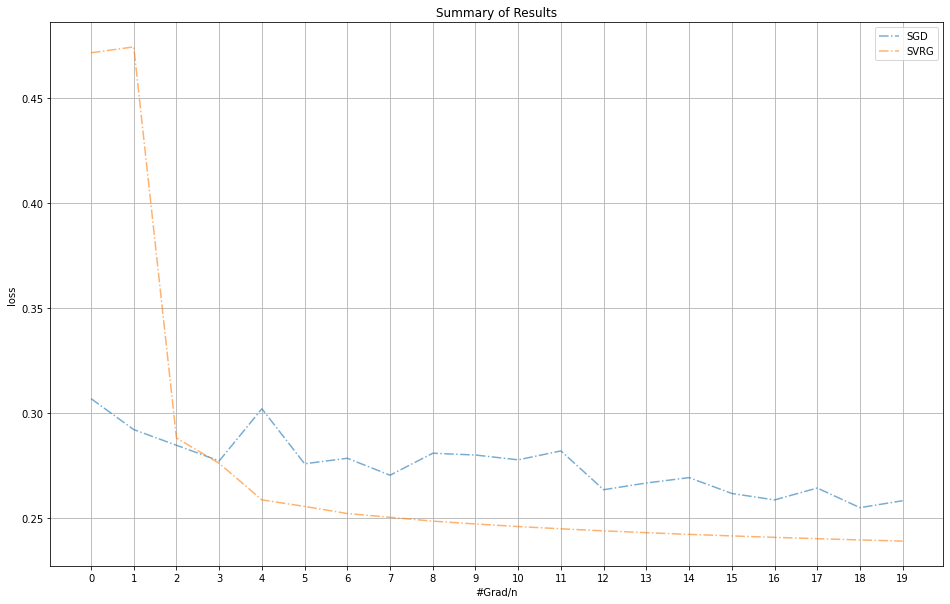

In [ ]:
record_graph([record_SGD_single,record_SVRG_single],'loss_#Grad/n')

In [ ]:
# SAGA


In [ ]:
# record_graph([record_SGD_single],'loss_#Grad/n')

### Minibatch Version (Test Acc)

In [ ]:
beta = np.copy(beta_init)

beta_SGD, record_SGD = train_SGD(train_data, train_label, test_data, test_label, beta_init, 0.01, loss_LR, loss_LR_grad, verbose = 1, n_run=20, mb_size=100)

# Grad/N 1: 1.27 seconds, Loss: 0.83, Test Accuracy: 0.789
# Grad/N 2: 2.55 seconds, Loss: 0.67, Test Accuracy: 0.815
# Grad/N 3: 3.95 seconds, Loss: 0.61, Test Accuracy: 0.828
# Grad/N 4: 5.19 seconds, Loss: 0.58, Test Accuracy: 0.832
# Grad/N 5: 5.91 seconds, Loss: 0.56, Test Accuracy: 0.835
# Grad/N 6: 6.62 seconds, Loss: 0.54, Test Accuracy: 0.839
# Grad/N 7: 7.32 seconds, Loss: 0.54, Test Accuracy: 0.840
# Grad/N 8: 8.01 seconds, Loss: 0.53, Test Accuracy: 0.842
# Grad/N 9: 8.72 seconds, Loss: 0.53, Test Accuracy: 0.843
# Grad/N 10: 9.43 seconds, Loss: 0.52, Test Accuracy: 0.844
# Grad/N 11: 10.14 seconds, Loss: 0.52, Test Accuracy: 0.844
# Grad/N 12: 10.87 seconds, Loss: 0.52, Test Accuracy: 0.843
# Grad/N 13: 11.57 seconds, Loss: 0.52, Test Accuracy: 0.844
# Grad/N 14: 12.29 seconds, Loss: 0.52, Test Accuracy: 0.844
# Grad/N 15: 13.02 seconds, Loss: 0.53, Test Accuracy: 0.843
# Grad/N 16: 13.74 seconds, Loss: 0.53, Test Accuracy: 0.843
# Grad/N 17: 14.47 seconds, Loss: 0.53, Tes

In [ ]:
# SAG


In [ ]:
# SVRG
beta = np.copy(beta_init)

beta_SVRG, record_SVRG = train_SVRG(train_data, train_label, test_data, test_label, beta_init, 0.01, loss_LR, loss_LR_grad, verbose = 1, n_run=20, mb_size=100)

# Grad/N 1: 9.99 seconds, Loss: 0.75, Test Accuracy: 0.849
# Grad/N 2: 20.16 seconds, Loss: 0.58, Test Accuracy: 0.871
# Grad/N 3: 30.10 seconds, Loss: 0.51, Test Accuracy: 0.881
# Grad/N 4: 40.27 seconds, Loss: 0.47, Test Accuracy: 0.887
# Grad/N 5: 50.73 seconds, Loss: 0.44, Test Accuracy: 0.890
# Grad/N 6: 61.06 seconds, Loss: 0.43, Test Accuracy: 0.893
# Grad/N 7: 71.32 seconds, Loss: 0.41, Test Accuracy: 0.896
# Grad/N 8: 81.36 seconds, Loss: 0.40, Test Accuracy: 0.897
# Grad/N 9: 91.35 seconds, Loss: 0.39, Test Accuracy: 0.900
# Grad/N 10: 101.29 seconds, Loss: 0.38, Test Accuracy: 0.903
# Grad/N 11: 111.21 seconds, Loss: 0.38, Test Accuracy: 0.904
# Grad/N 12: 121.20 seconds, Loss: 0.37, Test Accuracy: 0.906
# Grad/N 13: 131.11 seconds, Loss: 0.37, Test Accuracy: 0.906
# Grad/N 14: 141.25 seconds, Loss: 0.36, Test Accuracy: 0.907
# Grad/N 15: 151.16 seconds, Loss: 0.36, Test Accuracy: 0.908
# Grad/N 16: 161.12 seconds, Loss: 0.35, Test Accuracy: 0.909
# Grad/N 17: 171.06 seconds

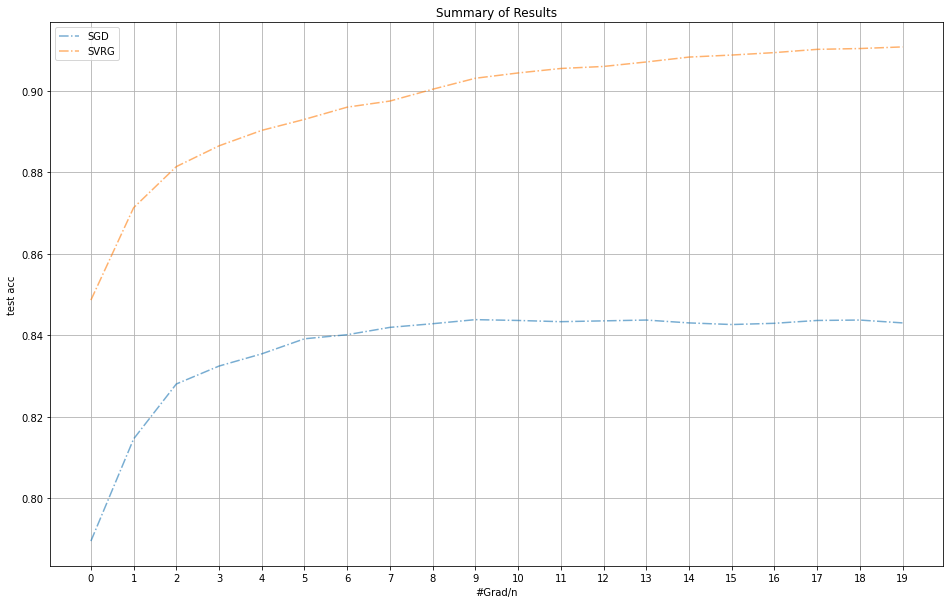

In [ ]:
record_graph([record_SGD, record_SVRG],'test_acc_#Grad/n')

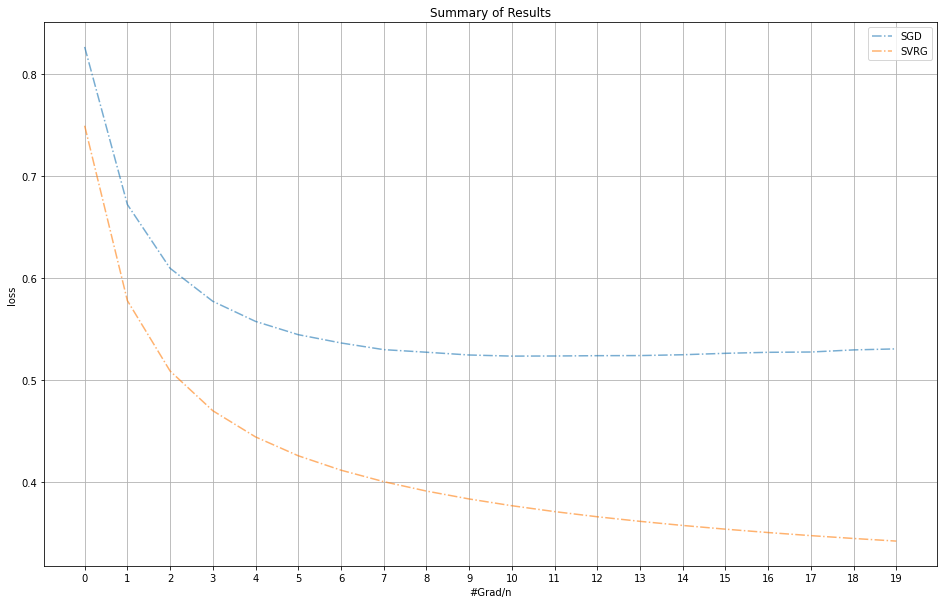

In [ ]:
record_graph([record_SGD, record_SVRG],'loss_#Grad/n')

In [ ]:
# SAGA


In [ ]:
# record_graph([record_SGD],'test_acc_#Grad/n')

In [ ]:
# record_graph([record_SGD],'loss_#Grad/n')

## Experiment with Adult

In [ ]:
adult_feature_train_norm.shape

(32561, 108)

In [ ]:
n_features = 108
n_classes = 2
np.random.seed(4212)

beta_init = np.random.normal(0,(1/(n_features*n_classes)), size=[n_classes, n_features])

In [ ]:
beta_init.shape

(2, 108)

In [ ]:
train_data, test_data, train_label, test_label = adult_feature_train_norm, adult_feature_test_norm, adult_label_train_bi, adult_label_test_bi

In [ ]:
print(np.unique(train_label, return_counts=True))
print(np.unique(test_label, return_counts=True))
print(train_data.shape)
print(test_data.shape)

(array([0, 1]), array([24720,  7841]))
(array([0, 1]), array([12435,  3846]))
(32561, 108)
(16281, 108)


### Single Version (Grad Var and Train Loss)

In [ ]:
beta = np.copy(beta_init)

beta_SGD_single, record_SGD_single = train_SGD_single(train_data, train_label, beta_init, 0.01, loss_LR, loss_LR_single_grad, n_run=20, verbose = 1)

# Grad/N 1: 1.04 seconds, Loss: 0.33
# Grad/N 2: 2.06 seconds, Loss: 0.33
# Grad/N 3: 3.07 seconds, Loss: 0.32
# Grad/N 4: 4.09 seconds, Loss: 0.32
# Grad/N 5: 5.09 seconds, Loss: 0.32
# Grad/N 6: 6.12 seconds, Loss: 0.32
# Grad/N 7: 7.14 seconds, Loss: 0.32
# Grad/N 8: 8.13 seconds, Loss: 0.32
# Grad/N 9: 9.14 seconds, Loss: 0.33
# Grad/N 10: 10.18 seconds, Loss: 0.32
# Grad/N 11: 11.19 seconds, Loss: 0.32
# Grad/N 12: 12.20 seconds, Loss: 0.33
# Grad/N 13: 13.21 seconds, Loss: 0.32
# Grad/N 14: 14.24 seconds, Loss: 0.33
# Grad/N 15: 15.24 seconds, Loss: 0.32
# Grad/N 16: 16.25 seconds, Loss: 0.33
# Grad/N 17: 17.27 seconds, Loss: 0.32
# Grad/N 18: 18.28 seconds, Loss: 0.32
# Grad/N 19: 19.31 seconds, Loss: 0.32
# Grad/N 20: 20.34 seconds, Loss: 0.32


In [ ]:
# SAG


In [ ]:
# SVRG
beta = np.copy(beta_init)

beta_SVRG_single, record_SVRG_single = train_SVRG_single(train_data, train_label, beta_init, 0.01, loss_LR, loss_LR_single_grad, n_run=10, verbose = 1)

# Grad/N 1: 1.93 seconds, Loss: 0.33
# Grad/N 2: 3.79 seconds, Loss: 0.32
# Grad/N 3: 5.57 seconds, Loss: 0.32
# Grad/N 4: 7.32 seconds, Loss: 0.32
# Grad/N 5: 9.12 seconds, Loss: 0.32
# Grad/N 6: 10.87 seconds, Loss: 0.32
# Grad/N 7: 12.75 seconds, Loss: 0.32
# Grad/N 8: 14.48 seconds, Loss: 0.32
# Grad/N 9: 16.25 seconds, Loss: 0.32
# Grad/N 10: 17.98 seconds, Loss: 0.32
# Grad/N 11: 19.79 seconds, Loss: 0.32
# Grad/N 12: 21.53 seconds, Loss: 0.32
# Grad/N 13: 23.36 seconds, Loss: 0.32
# Grad/N 14: 25.10 seconds, Loss: 0.32
# Grad/N 15: 26.88 seconds, Loss: 0.32
# Grad/N 16: 28.68 seconds, Loss: 0.32
# Grad/N 17: 30.45 seconds, Loss: 0.32
# Grad/N 18: 32.19 seconds, Loss: 0.32
# Grad/N 19: 33.95 seconds, Loss: 0.32
# Grad/N 20: 35.68 seconds, Loss: 0.32


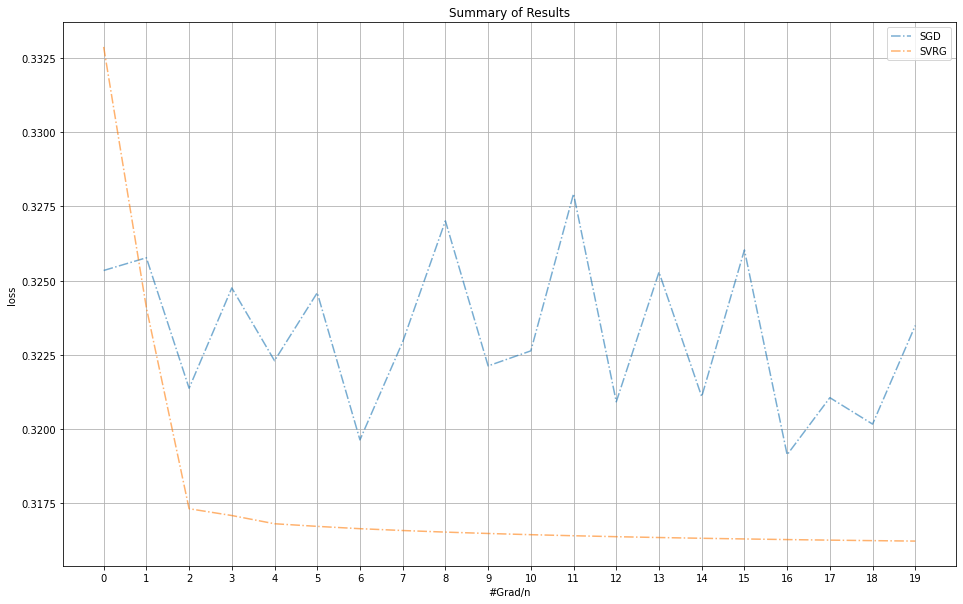

In [ ]:
record_graph([record_SGD_single, record_SVRG_single],'loss_#Grad/n')

In [ ]:
# SAGA


In [ ]:
# record_graph([record_SGD_single],'loss_#Grad/n')

### Minibatch Version (Test Acc)

In [ ]:
beta = np.copy(beta_init)

beta_SGD, record_SGD = train_SGD(train_data, train_label, test_data, test_label, beta_init, 0.01, loss_LR, loss_LR_grad, verbose = 1, n_run=20, mb_size=100)

# Grad/N 1: 0.31 seconds, Loss: 0.41, Test Accuracy: 0.711
# Grad/N 2: 0.59 seconds, Loss: 0.38, Test Accuracy: 0.696
# Grad/N 3: 0.89 seconds, Loss: 0.37, Test Accuracy: 0.690
# Grad/N 4: 1.18 seconds, Loss: 0.36, Test Accuracy: 0.685
# Grad/N 5: 1.46 seconds, Loss: 0.36, Test Accuracy: 0.682
# Grad/N 6: 1.76 seconds, Loss: 0.36, Test Accuracy: 0.682
# Grad/N 7: 2.05 seconds, Loss: 0.36, Test Accuracy: 0.680
# Grad/N 8: 2.34 seconds, Loss: 0.35, Test Accuracy: 0.679
# Grad/N 9: 2.64 seconds, Loss: 0.35, Test Accuracy: 0.679
# Grad/N 10: 2.92 seconds, Loss: 0.35, Test Accuracy: 0.678
# Grad/N 11: 3.21 seconds, Loss: 0.35, Test Accuracy: 0.679
# Grad/N 12: 3.50 seconds, Loss: 0.35, Test Accuracy: 0.676
# Grad/N 13: 3.78 seconds, Loss: 0.35, Test Accuracy: 0.677
# Grad/N 14: 4.06 seconds, Loss: 0.35, Test Accuracy: 0.676
# Grad/N 15: 4.38 seconds, Loss: 0.35, Test Accuracy: 0.677
# Grad/N 16: 4.65 seconds, Loss: 0.35, Test Accuracy: 0.677
# Grad/N 17: 4.94 seconds, Loss: 0.35, Test Accur

In [ ]:
# SAG


In [ ]:
# SVRG
beta = np.copy(beta_init)

beta_SVRG, record_SVRG = train_SVRG(train_data, train_label, test_data, test_label, beta_init, 0.01, loss_LR, loss_LR_grad, verbose = 1, n_run=20, mb_size=100)

# Grad/N 1: 1.76 seconds, Loss: 0.40, Test Accuracy: 0.699
# Grad/N 2: 3.43 seconds, Loss: 0.37, Test Accuracy: 0.682
# Grad/N 3: 5.70 seconds, Loss: 0.36, Test Accuracy: 0.677
# Grad/N 4: 7.39 seconds, Loss: 0.35, Test Accuracy: 0.675
# Grad/N 5: 9.07 seconds, Loss: 0.35, Test Accuracy: 0.673
# Grad/N 6: 10.73 seconds, Loss: 0.34, Test Accuracy: 0.673
# Grad/N 7: 12.44 seconds, Loss: 0.34, Test Accuracy: 0.672
# Grad/N 8: 14.11 seconds, Loss: 0.34, Test Accuracy: 0.671
# Grad/N 9: 15.76 seconds, Loss: 0.34, Test Accuracy: 0.671
# Grad/N 10: 17.43 seconds, Loss: 0.34, Test Accuracy: 0.670
# Grad/N 11: 19.16 seconds, Loss: 0.33, Test Accuracy: 0.670
# Grad/N 12: 20.87 seconds, Loss: 0.33, Test Accuracy: 0.670
# Grad/N 13: 22.59 seconds, Loss: 0.33, Test Accuracy: 0.670
# Grad/N 14: 24.25 seconds, Loss: 0.33, Test Accuracy: 0.670
# Grad/N 15: 25.92 seconds, Loss: 0.33, Test Accuracy: 0.669
# Grad/N 16: 27.59 seconds, Loss: 0.33, Test Accuracy: 0.669
# Grad/N 17: 29.27 seconds, Loss: 0.33

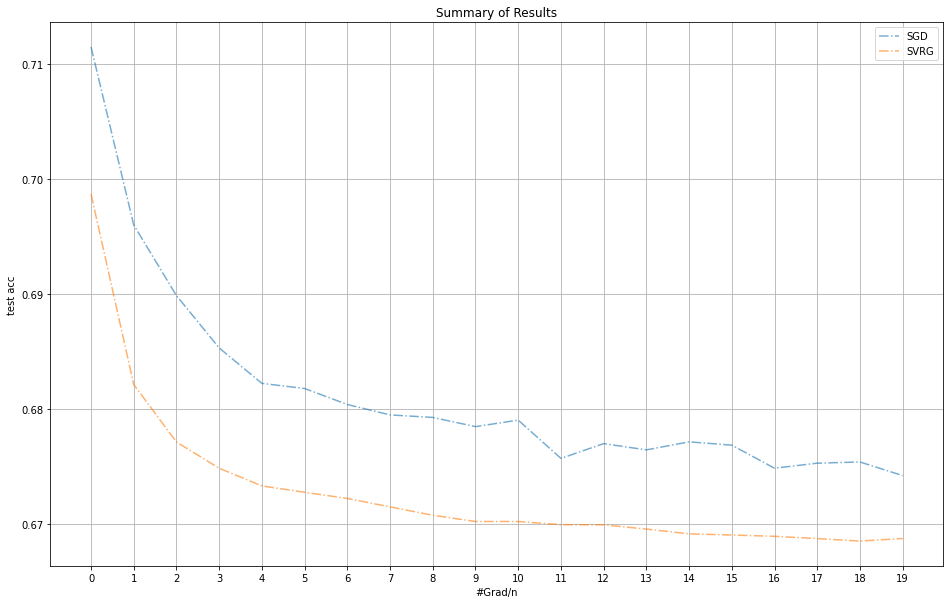

In [ ]:
record_graph([record_SGD, record_SVRG],'test_acc_#Grad/n')

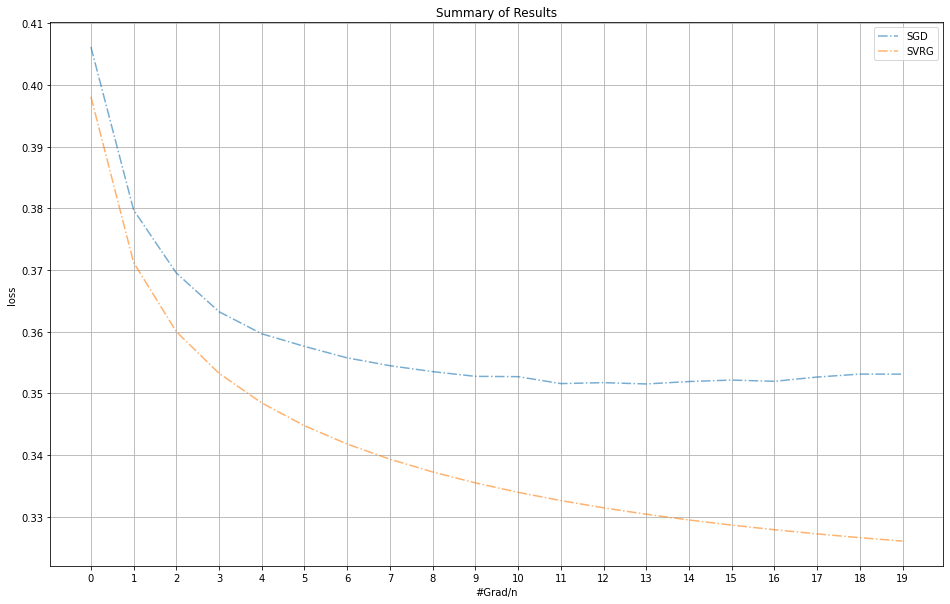

In [ ]:
record_graph([record_SGD, record_SVRG],'loss_#Grad/n')

In [ ]:
# SAGA


In [ ]:
# record_graph([record_SGD],key='test_acc_#Grad/n')

In [ ]:
# record_graph([record_SGD],key='loss_#Grad/n')